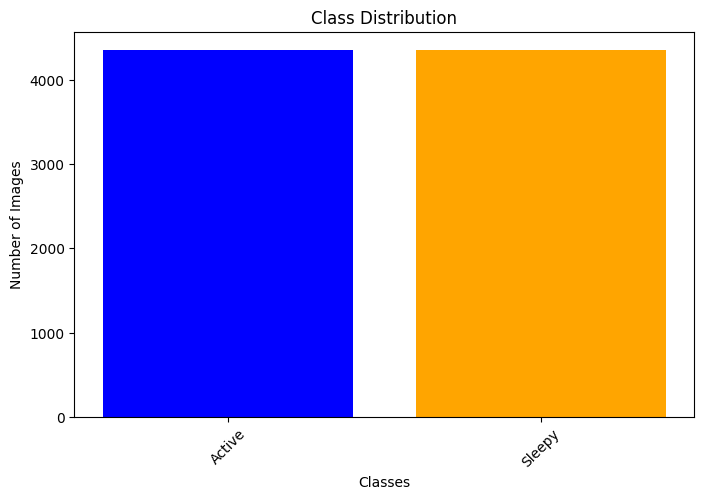

In [1]:
import os
import matplotlib.pyplot as plt

dataset_path = r'D:\MINOR\Project\my_dataset'  # Change to your dataset path
categories = ['Active', 'Sleepy']  # Adjust according to your classes

# Count the number of images in each class
class_counts = [len(os.listdir(os.path.join(dataset_path, category))) for category in categories]

# Plotting the class distribution
plt.figure(figsize=(8, 5))
plt.bar(categories, class_counts, color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

### Augmentation

In [ ]:
import cv2
import numpy as np
import os
import random

# Paths for dataset
input_folder = "D:\\MINOR\\Project\\new_dataset"

# Function to rotate image
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# Function to shift image
def shift_image(image, shift_x, shift_y):
    M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted

# Function to apply random transformations
def augment_image(img):
    # Rotate the image
    angle = random.randint(-30, 30)
    img_rotated = rotate_image(img, angle)

    # Shift the image
    shift_x = random.randint(-10, 10)
    shift_y = random.randint(-10, 10)
    img_shifted = shift_image(img_rotated, shift_x, shift_y)

    # Flip the image horizontally
    img_flipped = cv2.flip(img_shifted, 1)

    return img_flipped

# Function to augment images in each subfolder
def augment_images(subfolder):
    folder_path = os.path.join(input_folder, subfolder)

    # Loop through each image in the folder
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            continue

        # Generate 5 augmented images per original image
        for i in range(5):
            augmented_img = augment_image(img)
            new_img_name = f"aug_{i}_{img_name}"
            cv2.imwrite(os.path.join(folder_path, new_img_name), augmented_img)

# Apply augmentation to the 'Active' and 'Sleepy' folders
for folder in ['Active', 'Sleepy']:
    augment_images(folder)

### Resize

In [13]:
import cv2
import glob
import os

In [16]:
inputFolder = 'D:\\MINOR\\Project\\dataset\\no yawn'

In [17]:
i=0
for img in glob.glob(inputFolder+"/*.jpg"):
    image=cv2.imread(img)
    imgResized=cv2.resize(image, (224, 224))
    cv2.imwrite("D:\\MINOR\\Project\\my_dataset\\no yawn\\image_%0i.jpg" %i, imgResized)
    i+=1
    #cv2.imshow('image', imgResized)
    #cv2.waitKey(30)
cv2.destroyAllWindows()

### Split

In [18]:
import os
import shutil
import random

# Paths
input_folder = 'D:\\MINOR\\Project\\my_dataset'
output_base_folder = 'D:\\MINOR\\Project\\original_dataset'

# Define the dataset split ratio
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Create output directories for train, valid, test with subfolders for each class
for split in ['train', 'valid', 'test']:
    split_path = os.path.join(output_base_folder, split)
    if not os.path.exists(split_path):
        os.makedirs(split_path)
    
    for category in ['Active', 'Sleepy', 'yawn', 'no yawn']:
        category_path = os.path.join(split_path, category)
        if not os.path.exists(category_path):
            os.makedirs(category_path)

# Function to split data and move to respective folders
def split_and_move_images(class_folder):
    folder_path = os.path.join(input_folder, class_folder)
    images = os.listdir(folder_path)
    random.shuffle(images)

    total_images = len(images)
    train_size = int(train_ratio * total_images)
    val_size = int(val_ratio * total_images)

    train_images = images[:train_size]
    val_images = images[train_size:train_size + val_size]
    test_images = images[train_size + val_size:]

    # Move images to train folder
    for img in train_images:
        src = os.path.join(folder_path, img)
        dst = os.path.join(output_base_folder, 'train', class_folder, img)
        shutil.copy(src, dst)

    # Move images to valid folder
    for img in val_images:
        src = os.path.join(folder_path, img)
        dst = os.path.join(output_base_folder, 'valid', class_folder, img)
        shutil.copy(src, dst)

    # Move images to test folder
    for img in test_images:
        src = os.path.join(folder_path, img)
        dst = os.path.join(output_base_folder, 'test', class_folder, img)
        shutil.copy(src, dst)

# Apply split and move for each class
for class_name in ['Active', 'Sleepy', 'yawn', 'no yawn']:
    split_and_move_images(class_name)

### Annotations

In [19]:
import os

# Base path to the dataset containing train, valid, and test folders
base_dataset_path = 'D:\\MINOR\\Project\\original_dataset'

# Classes in the dataset
classes = ['Active', 'Sleepy']  # Only two classes

# Function to create annotation file
def create_annotation_file(folder, output_file):
    folder_path = os.path.join(base_dataset_path, folder)
    with open(output_file, 'w') as f:
        # Loop through each class folder
        for label, class_name in enumerate(classes):
            class_folder = os.path.join(folder_path, class_name)
            # Loop through each image in the class folder
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                # Write the image path and class label to the file
                f.write(f"{img_path} {label}\n")

# Create annotation files for train, valid, and test folders
create_annotation_file('train', 'train_annotations.txt')
create_annotation_file('valid', 'valid_annotations.txt')
create_annotation_file('test', 'test_annotations.txt')